Kyphosis dataset contains features such as: Age, Number and start which determine if kyhosis is present or not.
Age describes the age of the patient in months
Number: describes the number of vertebrae involved in the curvature.
Start: describes the starting vertebra of the curvature.
Kyphosis: is present (1), or not (0) that is 0 = absent and 1 = present


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Reading the csv file
df = pd.read_csv('kyphosis.csv')

In [3]:
df

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
...,...,...,...,...
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6


Data Exploration

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [5]:
df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


In [6]:
df.describe(include='all')


,Kyphosis,Age,Number,Start
count,81,81.000000,81.000000,81.000000
unique,2,NaN,NaN,NaN
top,absent,NaN,NaN,NaN
freq,64,NaN,NaN,NaN
mean,NaN,83.654321,4.049383,11.493827
std,NaN,58.104251,1.619423,4.883962
min,NaN,1.000000,2.000000,1.000000
25%,NaN,26.000000,3.000000,9.000000
50%,NaN,87.000000,4.000000,13.000000
75%,NaN,130.000000,5.000000,16.000000


In [7]:
df.describe(include='all')

,Kyphosis,Age,Number,Start
count,81,81.000000,81.000000,81.000000
unique,2,NaN,NaN,NaN
top,absent,NaN,NaN,NaN
freq,64,NaN,NaN,NaN
mean,NaN,83.654321,4.049383,11.493827
std,NaN,58.104251,1.619423,4.883962
min,NaN,1.000000,2.000000,1.000000
25%,NaN,26.000000,3.000000,9.000000
50%,NaN,87.000000,4.000000,13.000000
75%,NaN,130.000000,5.000000,16.000000


In [8]:
df.isnull().sum()

Kyphosis    0
Age         0
Number      0
Start       0
dtype: int64

In [9]:
df.isna().any()

Kyphosis    False
Age         False
Number      False
Start       False
dtype: bool

In [10]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
76    False
77    False
78    False
79    False
80    False
Length: 81, dtype: bool

Data Visualization

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt 


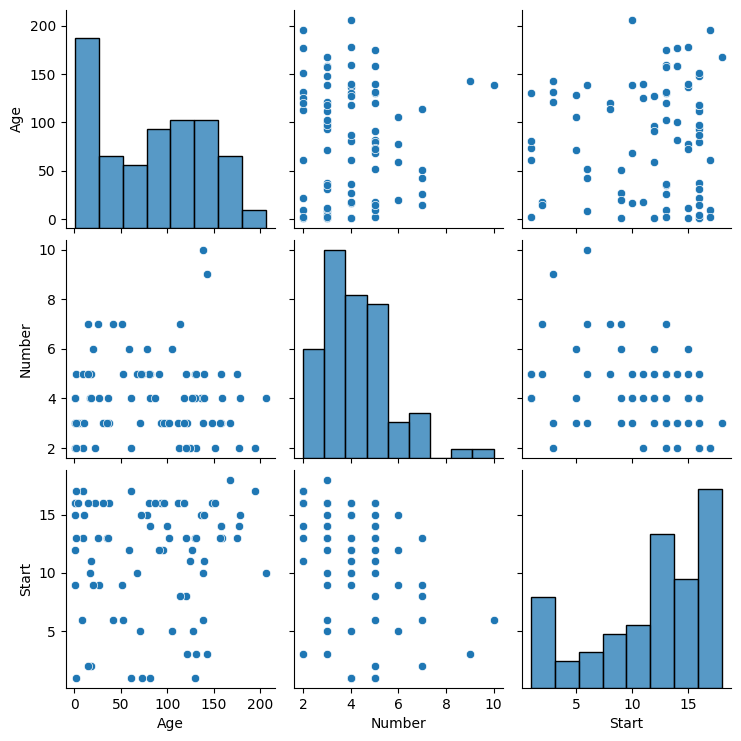

In [12]:

sns.pairplot(df)

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
encode = LabelEncoder()

In [15]:
df['new_kyphosis'] = encode.fit_transform(df['Kyphosis'])

In [16]:
df

,Kyphosis,Age,Number,Start,new_kyphosis
0,absent,71,3,5,0
1,absent,158,3,14,0
2,present,128,4,5,1
3,absent,2,5,1,0
4,absent,1,4,15,0
...,...,...,...,...,...
76,present,157,3,13,1
77,absent,26,7,13,0
78,absent,120,2,13,0
79,present,42,7,6,1


In [17]:
df.drop('Kyphosis', axis=1, inplace=True)

In [18]:
df

,Age,Number,Start,new_kyphosis
0,71,3,5,0
1,158,3,14,0
2,128,4,5,1
3,2,5,1,0
4,1,4,15,0
...,...,...,...,...
76,157,3,13,1
77,26,7,13,0
78,120,2,13,0
79,42,7,6,1


<Axes: >

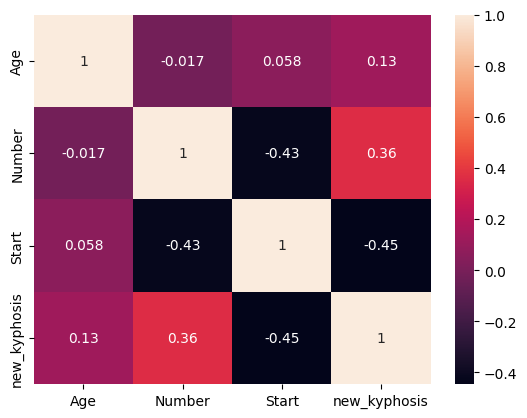

In [19]:

sns.heatmap(df.corr(), annot=True)

Checking for outliers

In [20]:
z_scores = np.abs(df - df.mean() / df.std())
outliers = df[z_scores > 3]

In [21]:

outliers

,Age,Number,Start,new_kyphosis
0,71.0,NaN,NaN,NaN
1,158.0,NaN,14.0,NaN
2,128.0,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,15.0,NaN
...,...,...,...,...
76,157.0,NaN,13.0,NaN
77,26.0,7.0,13.0,NaN
78,120.0,NaN,13.0,NaN
79,42.0,7.0,6.0,NaN


In [22]:
x = df.drop(['new_kyphosis'], axis=1)

In [23]:
x

,Age,Number,Start
0,71,3,5
1,158,3,14
2,128,4,5
3,2,5,1
4,1,4,15
...,...,...,...
76,157,3,13
77,26,7,13
78,120,2,13
79,42,7,6


In [24]:
y = df['new_kyphosis']
y


0     0
1     0
2     1
3     0
4     0
     ..
76    1
77    0
78    0
79    1
80    0
Name: new_kyphosis, Length: 81, dtype: int64

In [25]:
y.nunique()

2

In [26]:
y.value_counts()

new_kyphosis
0    64
1    17
Name: count, dtype: int64

Normalizing the data by Scaling x features

In [27]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
x_scaled = scalar.fit_transform(x)

In [28]:
x_scaled

array([[-0.21914343, -0.65203532, -1.33790708],
       [ 1.28749437, -0.65203532,  0.51634056],
       [ 0.7679641 , -0.03068401, -1.33790708],
       [-1.41406306,  0.59066729, -2.16201714],
       [-1.43138074, -0.03068401,  0.72236808],
       [-1.43138074, -1.27338662,  0.92839559],
       [-0.39232019, -1.27338662,  1.13442311],
       [-0.80794441, -0.65203532,  0.92839559],
       [ 0.50819896, -1.27338662,  0.92839559],
       [-0.42695554,  1.21201859,  0.10428553],
       [-0.02864899,  0.59066729,  0.51634056],
       [ 1.11431761, -0.65203532,  0.92839559],
       [-1.13698025,  0.59066729, -1.95598962],
       [-1.43138074, -0.03068401,  0.10428553],
       [ 1.46067113, -0.65203532,  1.34045062],
       [-1.43138074, -0.65203532,  0.92839559],
       [-0.0979197 ,  1.21201859,  0.72236808],
       [ 1.58189486,  0.59066729,  0.31031305],
       [-0.06328435,  0.59066729,  0.92839559],
       [-0.98112117, -0.03068401, -0.51379701],
       [-1.06770955, -1.27338662,  0.928

Training and Splitting

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=10)

In [31]:
x_train.shape

(64, 3)

In [32]:
y_train.shape

(64,)

Balancing the target variable y using smote

In [33]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=10)
x_res, y_res = smote.fit_resample(x_scaled, y)


In [34]:
print('Original data shape:', x_train.shape, y_train.shape)

Original data shape: (64, 3) (64,)


In [35]:
print('Resampled data shape:', x_res.shape, y_res.shape)

Resampled data shape: (128, 3) (128,)


In [36]:
print(x_scaled.shape)

(81, 3)


USING K NEAREST NEIGHBOR TO BUILD A MODEL

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
knc = KNeighborsClassifier(n_neighbors= 6)
knc.fit(x_res, y_res)

KNeighborsClassifier(n_neighbors=6)

In [39]:
y_pred_knc = knc.predict(x_test)

In [40]:
y_pred_knc

array([0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1])

In [41]:
y_pred_knc =  knc.predict([[11, 3, 15]])

In [42]:
y_pred_knc

array([0])

In [43]:
error_rate = []
for i in range(1,40):
    knc = KNeighborsClassifier(n_neighbors=i)
    knc.fit(x_res, y_res)
    pred_i= knc.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

In [44]:
error_rate

[np.float64(0.0),
 np.float64(0.0),
 np.float64(0.058823529411764705),
 np.float64(0.058823529411764705),
 np.float64(0.11764705882352941),
 np.float64(0.11764705882352941),
 np.float64(0.17647058823529413),
 np.float64(0.17647058823529413),
 np.float64(0.17647058823529413),
 np.float64(0.23529411764705882),
 np.float64(0.23529411764705882),
 np.float64(0.23529411764705882),
 np.float64(0.23529411764705882),
 np.float64(0.23529411764705882),
 np.float64(0.17647058823529413),
 np.float64(0.17647058823529413),
 np.float64(0.17647058823529413),
 np.float64(0.23529411764705882),
 np.float64(0.17647058823529413),
 np.float64(0.23529411764705882),
 np.float64(0.23529411764705882),
 np.float64(0.23529411764705882),
 np.float64(0.23529411764705882),
 np.float64(0.23529411764705882),
 np.float64(0.23529411764705882),
 np.float64(0.23529411764705882),
 np.float64(0.23529411764705882),
 np.float64(0.23529411764705882),
 np.float64(0.23529411764705882),
 np.float64(0.23529411764705882),
 np.float6

LOGISTIC REGRESSION MODEL

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
lr = LogisticRegression()

In [47]:
lr.fit(x_res, y_res)

LogisticRegression()

In [48]:
y_pred_lr = lr.predict(x_test)

In [49]:

y_pred_lr

array([1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1])

In [50]:
from sklearn.metrics import classification_report, confusion_matrix

In [51]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.80      0.73      0.76        11
           1       0.57      0.67      0.62         6

    accuracy                           0.71        17
   macro avg       0.69      0.70      0.69        17
weighted avg       0.72      0.71      0.71        17



In [52]:
print(confusion_matrix(y_test, y_pred_lr))

[[8 3]
 [2 4]]


In [53]:

from sklearn.tree import DecisionTreeClassifier

In [54]:

dfc = DecisionTreeClassifier()

In [55]:

dfc.fit(x_res, y_res)

DecisionTreeClassifier()

In [56]:
y_pred_dfc = dfc.predict(x_test)

In [57]:

y_pred_dfc

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1])

In [58]:

print(classification_report(y_test, y_pred_dfc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         6

    accuracy                           1.00        17
   macro avg       1.00      1.00      1.00        17
weighted avg       1.00      1.00      1.00        17



In [59]:

print(confusion_matrix(y_test, y_pred_dfc))

[[11  0]
 [ 0  6]]


RANDOM FOREST MODEL

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:

rfc = RandomForestClassifier()

In [62]:
rfc.fit(x_res, y_res)

RandomForestClassifier()

In [63]:
y_pred_rfc = rfc.predict(x_test)

In [64]:

y_pred_rfc

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1])

In [65]:

print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         6

    accuracy                           1.00        17
   macro avg       1.00      1.00      1.00        17
weighted avg       1.00      1.00      1.00        17



In [66]:

print(confusion_matrix(y_test, y_pred_rfc))

[[11  0]
 [ 0  6]]


SAVING THE MODEL

In [67]:

import pickle

In [68]:
pickle.dump(rfc, open('C:/Users/HP/Desktop/all files/Data Science Learning/peace_modelB.pkl', 'wb'))

In [69]:
trial = pickle.load(open('C:/Users/HP/Desktop/all files/Data Science Learning/peace_modelB.pkl', 'rb'))

In [70]:
trial.predict([[71, 3, 5]])

array([0])

In [71]:
# Saving the model with joblib
import joblib
joblib.dump(rfc, 'rfc_model.joblib')


['rfc_model.joblib']

In [72]:
loaded_model = joblib.load('rfc_model.joblib')
prediction = loaded_model.predict(x_test)

In [73]:
prediction = loaded_model.predict([[71, 3, 5]])
prediction

array([0])

SCALAR VECTOR MACHINE MODEL

In [74]:
from sklearn import svm

In [75]:
model = svm.SVC(kernel='linear', C=3, gamma='auto')


In [76]:

model.fit(x_res, y_res)

SVC(C=3, gamma='auto', kernel='linear')

In [77]:
svm_model = model.predict(x_test)

In [78]:

svm_model

array([1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1])

In [79]:

print(classification_report(y_test, svm_model))

              precision    recall  f1-score   support

           0       0.80      0.73      0.76        11
           1       0.57      0.67      0.62         6

    accuracy                           0.71        17
   macro avg       0.69      0.70      0.69        17
weighted avg       0.72      0.71      0.71        17



In [80]:

print(confusion_matrix(y_test, svm_model))

[[8 3]
 [2 4]]


In [81]:

import pickle

In [82]:
pickle.dump(svm_model, open('svmModel.pkl', 'wb'))


DECISION TREE ALGORITHM

In [83]:
from sklearn.tree import DecisionTreeClassifier


In [84]:
dtf = DecisionTreeClassifier()

In [85]:
dtf.fit(x_res, y_res)

DecisionTreeClassifier()

In [86]:
y_dtf_pred = dtf.predict(x_test)
y_dtf_pred

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1])

In [87]:
print(confusion_matrix(y_test, y_dtf_pred))

[[11  0]
 [ 0  6]]


In [88]:
print(classification_report(y_test, y_dtf_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         6

    accuracy                           1.00        17
   macro avg       1.00      1.00      1.00        17
weighted avg       1.00      1.00      1.00        17



checking all versions of libraries

In [89]:
import pandas 
pandas.__version__

'2.2.3'

In [90]:
import seaborn
seaborn.__version__

'0.13.2'

Validation Loss and Accuracy for DecisionTree Algorithm

In [91]:
import matplotlib.pyplot as plt
import numpy as np

In [92]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, validation_curve
import numpy as np

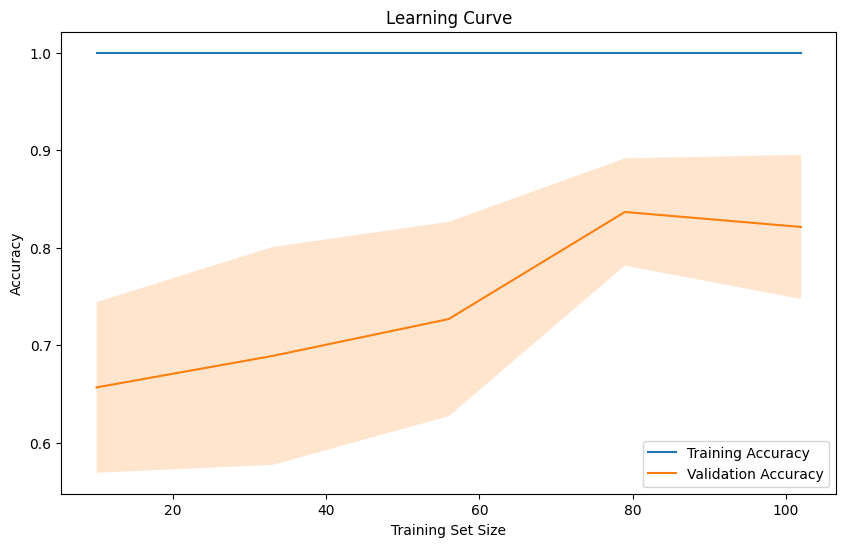

In [93]:
# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    dtf, x_res, y_res, cv=5, scoring='accuracy', n_jobs=-1
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.plot(train_sizes, test_mean, label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2)
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

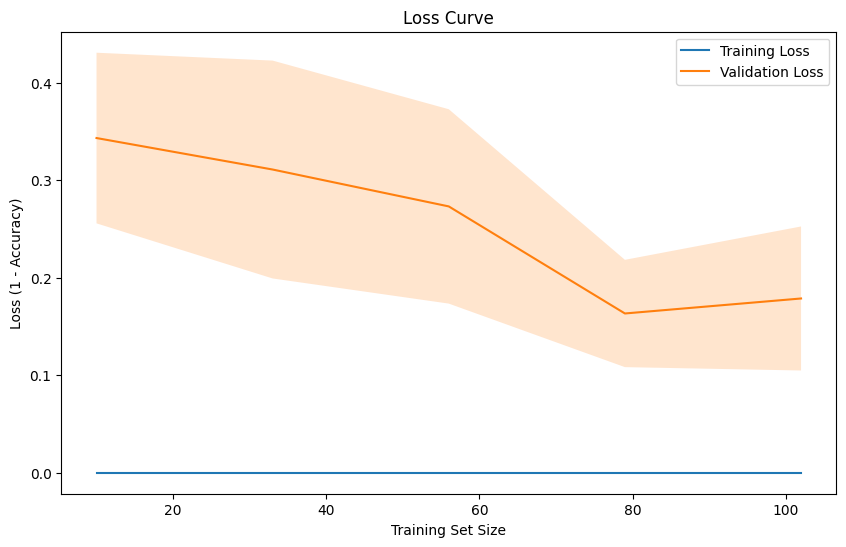

In [94]:
# Loss Curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, 1 - train_mean, label='Training Loss')
plt.fill_between(train_sizes, 1 - train_mean + train_std, 1 - train_mean - train_std, alpha=0.2)
plt.plot(train_sizes, 1 - test_mean, label='Validation Loss')
plt.fill_between(train_sizes, 1 - test_mean + test_std, 1 - test_mean - test_std, alpha=0.2)
plt.title('Loss Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Loss (1 - Accuracy)')
plt.legend()
plt.show()

Validation and Accuracy Loss for RandomForest Alogorithm

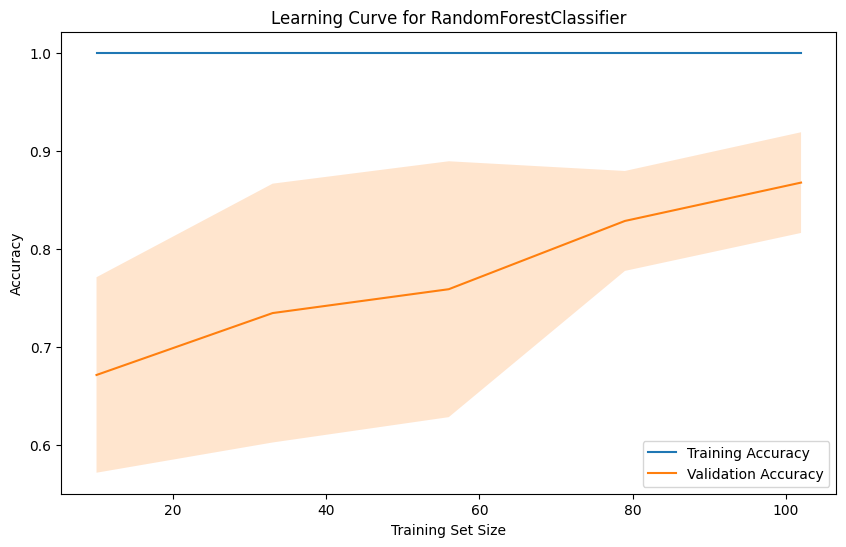

In [95]:
# Learning Curve for RandomForestClassifier
rfc = RandomForestClassifier()
train_sizes, train_scores, test_scores = learning_curve(
    rfc, x_res, y_res, cv=5, scoring='accuracy', n_jobs=-1
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.plot(train_sizes, test_mean, label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2)
plt.title('Learning Curve for RandomForestClassifier')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()

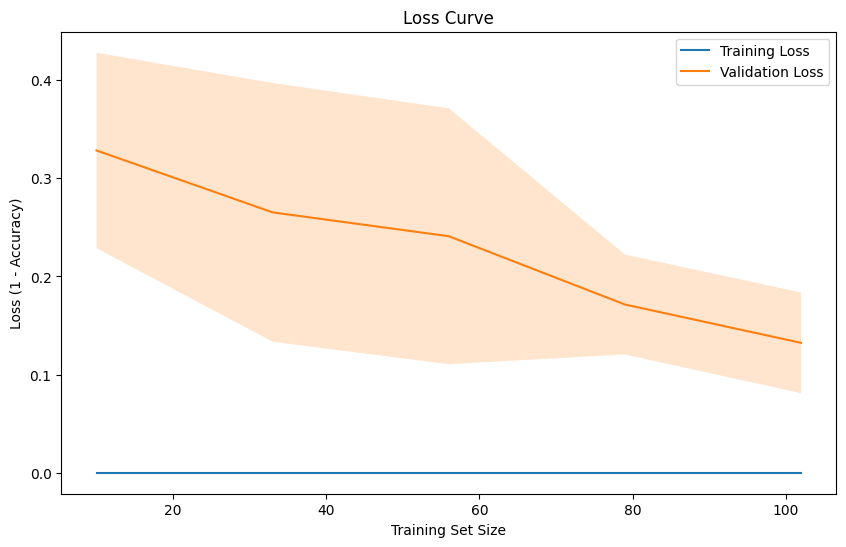

In [96]:
# Loss Curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, 1 - train_mean, label='Training Loss')
plt.fill_between(train_sizes, 1 - train_mean + train_std, 1 - train_mean - train_std, alpha=0.2)
plt.plot(train_sizes, 1 - test_mean, label='Validation Loss')
plt.fill_between(train_sizes, 1 - test_mean + test_std, 1 - test_mean - test_std, alpha=0.2)
plt.title('Loss Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Loss (1 - Accuracy)')
plt.legend()
plt.show()